In [24]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import json

model = SentenceTransformer('all-mpnet-base-v2')
topic_model = BERTopic(embedding_model=model, min_topic_size=2)

with open("../../data/words.json", 'r') as file:
    words = json.load(file)


In [28]:
topics, probs = topic_model.fit_transform(["age", "zebra", "telephone", "orange", "grape", "aztec", "pickle", "chair", "cluster", "minimum"])


/home/marcuswrrn/Projects/Machine_Learning/NLP/codenames/.venv/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [29]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2,-1_minimum_cluster__,"[minimum, cluster, , , , , , , , ]","[cluster, minimum]"
1,0,6,0_zebra_pickle_orange_grape,"[zebra, pickle, orange, grape, aztec, age, , ,...","[zebra, age, grape]"
2,1,2,1_telephone_chair__,"[telephone, chair, , , , , , , , ]","[chair, telephone]"


In [31]:
# topic_model.visualize_topics()

In [63]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(words["code_embeddings"])
embedding.shape

(400, 2)

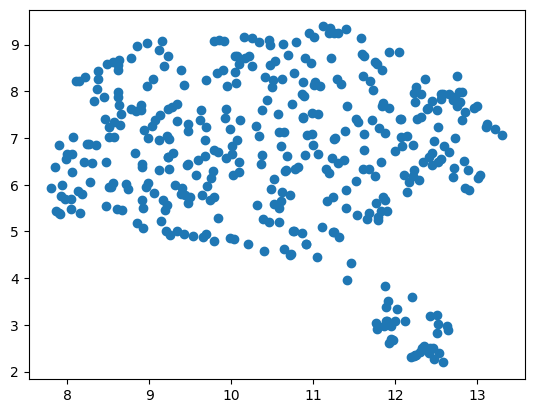

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(embedding[:, 0], embedding[:, 1])

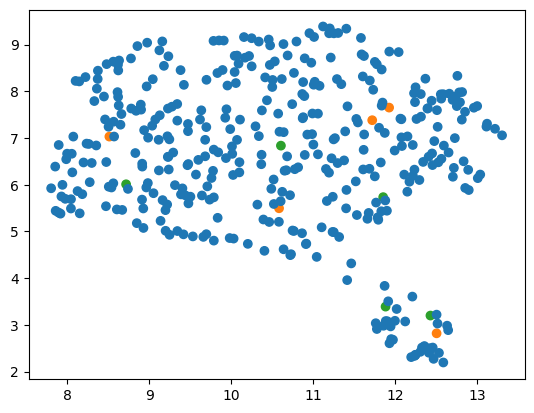

In [65]:
# pos_words = "drop pumpkin cotton conductor teacher".split(' ') 
# neg_words = "ketchup mail ghost mammoth check".split(' ')

def get_color(x):
    pos_arr = [34, 21, 8, 17, 9]
    neg_arr = [200, 54, 1, 12, 350]
    if x in pos_arr:
        return 1
    if x in neg_arr:
        return 2
    return 0

plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[get_color(x)] for x in range(len(embedding))])
